## Evaluate performance of models on prompt engineering set

* Few shot LLama 7b
* Few shot LLama 13
* Expert annotated set - "supposed ground truth


### Import packages

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Read data 

In [128]:
def load_file(file_relative_path, file_format='csv'):
    # Construct the absolute path
    absolute_path = '/data/volume_2/LLM_validate/src/analysis/performance/' + file_relative_path

    if file_format == 'csv':
        # Read the CSV file into a DataFrame
        df = pd.read_csv(absolute_path)
    elif file_format == 'excel':
        # Read the Excel file into a DataFrame
        df = pd.read_excel(absolute_path)
    else:
        raise ValueError("Unsupported file format. Supported formats are 'csv' and 'excel'.")

    return df


In [129]:
def load_excel_file(file_relative_path):
    # Construct the absolute path
    absolute_path = '/data/volume_2/LLM_validate/src/analysis/performance/' + file_relative_path

    # Read the Excel file into a DataFrame
    df = pd.read_excel(absolute_path)

    return df

In [130]:
#7b
df1 = load_file('../../../../initial_out/7B_prompt_quality.csv')

In [131]:
#13b
df2 = load_file('../../../../initial_out/13b_prompt_quality.csv')

In [132]:
#exprt annotated
df3 = load_excel_file('../../../../initial_out/prompt_validation_set_final_done.xlsx')

### Calculate percision, F1, confusion matrix 

In [117]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix

def calculate_precision_recall_f1_accuracy(df1, df3):
    # Calculate precision, recall, F1 score, and accuracy based on the 'event-match' and 'topic_match' columns
    precision_event = precision_score(df3['event_match'], df1['Event_match'])
    recall_event = recall_score(df3['event_match'], df1['Event_match'])
    f1_event = f1_score(df3['event_match'], df1['Event_match'])
    accuracy_event = accuracy_score(df3['event_match'], df1['Event_match'])

    precision_topic = precision_score(df3['topic_match'], df1['Topic_match'])
    recall_topic = recall_score(df3['topic_match'], df1['Topic_match'])
    f1_topic = f1_score(df3['topic_match'], df1['Topic_match'])
    accuracy_topic = accuracy_score(df3['topic_match'], df1['Topic_match'])
    
    # Create confusion matrices based on the 'event_match' and 'topic_match' columns
    conf_matrix_topic = confusion_matrix(df3['topic_match'], df1['Topic_match'])
    conf_matrix_event = confusion_matrix(df3['event_match'], df1['Event_match'])

    # Return the results as a dictionary
    results = {
        "Precision (topic_match)": precision_topic,
        "Recall (topic_match)": recall_topic,
        "F1 Score (topic_match)": f1_topic,
        "Accuracy (topic_match)": accuracy_topic,
        "Precision (event_match)": precision_event,
        "Recall (event_match)": recall_event,
        "F1 Score (event_match)": f1_event,
        "Accuracy (event_match)": accuracy_event,
        "Confusion Matrix (topic_match)": conf_matrix_topic,
        "Confusion Matrix (event_match)": conf_matrix_event
    }

    return results


In [109]:
results = calculate_precision_recall_f1_accuracy(df1, df3)

In [133]:
results2 = calculate_precision_recall_f1_accuracy(df2, df3)

In [134]:
results

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.8933333333333333,
 'F1 Score (topic_match)': 0.8427672955974843,
 'Accuracy (topic_match)': 0.7474747474747475,
 'Precision (event_match)': 0.2926829268292683,
 'Recall (event_match)': 0.631578947368421,
 'F1 Score (event_match)': 0.39999999999999997,
 'Accuracy (event_match)': 0.6363636363636364,
 'Confusion Matrix (topic_match)': array([[ 7, 17],
        [ 8, 67]]),
 'Confusion Matrix (event_match)': array([[51, 29],
        [ 7, 12]])}

In [135]:
results2

{'Precision (topic_match)': 0.8260869565217391,
 'Recall (topic_match)': 0.5066666666666667,
 'F1 Score (topic_match)': 0.628099173553719,
 'Accuracy (topic_match)': 0.5454545454545454,
 'Precision (event_match)': 0.391304347826087,
 'Recall (event_match)': 0.47368421052631576,
 'F1 Score (event_match)': 0.42857142857142855,
 'Accuracy (event_match)': 0.7575757575757576,
 'Confusion Matrix (topic_match)': array([[16,  8],
        [37, 38]]),
 'Confusion Matrix (event_match)': array([[66, 14],
        [10,  9]])}

#### This confusion matrix is a 2x2 matrix that summarizes the performance of a binary classification model. It consists of four values:

* Class 0 (no match)
* Class 1 (match)


* The top-left cell represents True Negatives (TN), which are the instances correctly classified as "Class 0."
* The top-right cell represents False Positives (FP), which are instances incorrectly classified as "Class 1."
* The bottom-left cell represents False Negatives (FN), which are instances incorrectly classified as "Class 0."
* The bottom-right cell represents True Positives (TP), which are instances correctly classified as "Class 1."

### Plot confusion matrix 

#### llama 7B

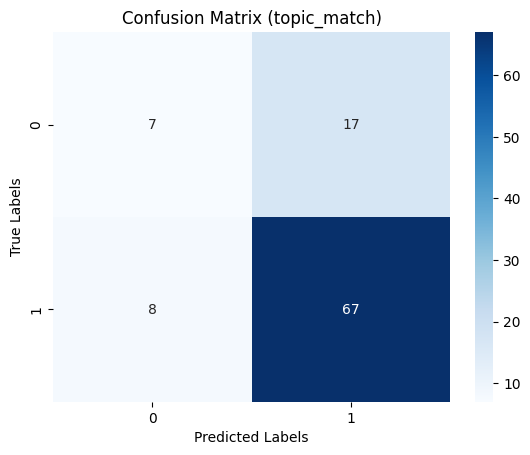

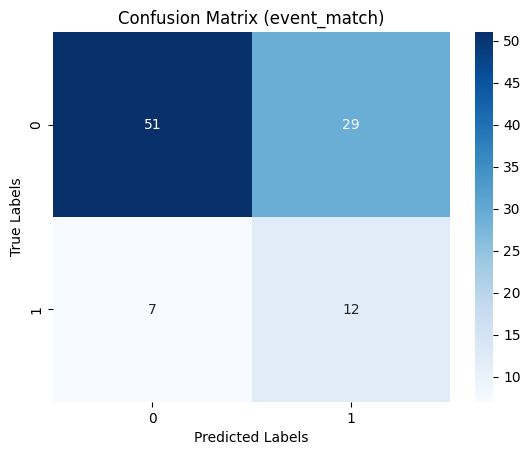

In [46]:
# Plot the confusion matrices
#llama 7b

sns.heatmap(results["Confusion Matrix (topic_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (topic_match)')
plt.show()


sns.heatmap(results["Confusion Matrix (event_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (event_match)')
plt.show()

#### llama 13B

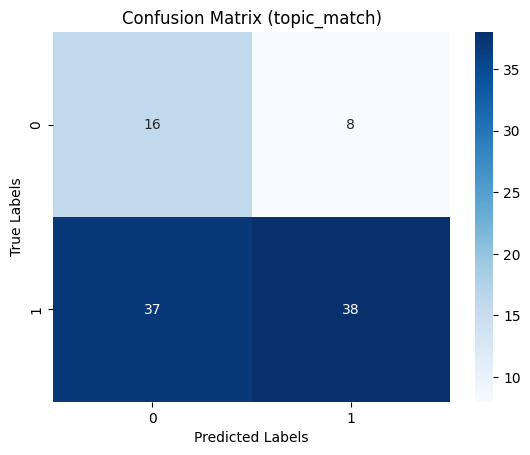

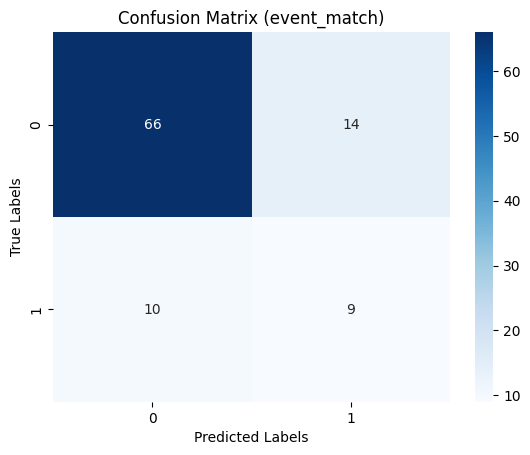

In [33]:
sns.heatmap(results2["Confusion Matrix (topic_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (topic_match)')
plt.show()


sns.heatmap(results2["Confusion Matrix (event_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (event_match)')
plt.show()